The command below initializes the object and loads all the calender information into memory. It will only load appointments that start with a prefix of a project_nickname. 

In [1]:
# create the TableMaker object.
from  OutlookToPandas import *
outlook = OutlookToPandas()

You can see a sample of the database contained by this command. 

In [2]:
outlook.joined_database

,start,project_nickname,subject,duration,body,project_task_number,rec_cctr,receiver_wbs_element,rec_order,typ,task_lev,task_com,name,total
0,2019-07-15 10:00:00,BB-GI,coding,60,,None,714702,P-002930.002,NaN,BWK,1.0,BWK,Better Evidence for Better Building Code,NaN
1,2019-07-18 10:00:00,BB-GI,FW: Update on AEB work,120,\r\n\r\n \r\n\r\n-----Original Appointment---...,None,714702,P-002930.002,NaN,BWK,1.0,BWK,Better Evidence for Better Building Code,NaN
2,2019-07-23 07:00:00,BB-GI,FW: EBC Building Energy Codes Working Group - ...,60,\r\n\r\n \r\n\r\n-----Original Appointment---...,None,714702,P-002930.002,NaN,BWK,1.0,BWK,Better Evidence for Better Building Code,NaN
3,2019-07-23 08:00:00,BB-GI,Codes S&T coordination meeting,60,"On reflection, I realized that the likelihood ...",None,714702,P-002930.002,NaN,BWK,1.0,BWK,Better Evidence for Better Building Code,NaN
4,2019-07-23 13:30:00,BB-GI,Ideas about stock modeling/Alteration codes...,60,\r\n,None,714702,P-002930.002,NaN,BWK,1.0,BWK,Better Evidence for Better Building Code,NaN
5,2019-07-15 11:00:00,ADMIN,Pathways project plan; S&T outreach; OEE MOA; ...,60,\r\n,None,714702,NaN,NaN,ADM,1.0,ADM,HOUSING AND BUILDINGS,NaN
6,2019-07-15 12:00:00,ADMIN,Timsheets,120,,None,714702,NaN,NaN,ADM,1.0,ADM,HOUSING AND BUILDINGS,NaN
7,2019-07-16 10:00:00,ADMIN,Weekly Stand Up Meeting,30,1 877 413 4785\r\nID 6773700,None,714702,NaN,NaN,ADM,1.0,ADM,HOUSING AND BUILDINGS,NaN
8,2019-07-16 10:30:00,ADMIN,Computer Update,30,,None,714702,NaN,NaN,ADM,1.0,ADM,HOUSING AND BUILDINGS,NaN
9,2019-07-16 11:00:00,ADMIN,Lit review of Surrogate Modelling,30,,None,714702,NaN,NaN,ADM,1.0,ADM,HOUSING AND BUILDINGS,NaN


This is loading the local Excel file with the SAP information. The project_name is an alias you use as a pre-fix for your Outlook appointment subjects.

In [3]:
outlook.projects_df

,project_nickname,rec_cctr,receiver_wbs_element,rec_order,typ,task_lev,task_com,name,total
0,PW,714702,P-004001.001,NaN,BWK,1.0,BWK,Pathways for Housing and Buildings,NaN
1,BB-GI,714702,P-002930.002,NaN,BWK,1.0,BWK,Better Evidence for Better Building Code,NaN
2,BB-OEE,714702,P-002930.001,NaN,BWK,1.0,BWK,Better Evidence for Better Bldg Code OEE,NaN
3,ADMIN,714702,NaN,NaN,ADM,1.0,ADM,HOUSING AND BUILDINGS,NaN
4,LEAVE,714702,NaN,NaN,LVE,1.0,LVE,HOUSING AND BUILDINGS,NaN


In [4]:
outlook.create_week_sap_report(2019, 29)


,project_nickname,rec_cctr,receiver_wbs_element,rec_order,typ,task_lev,task_com,name,total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,PW,714702,P-004001.001,,BWK,1.0,BWK,Pathways for Housing and Buildings,,1.0,4.0,0.0,1.5,0.0,0.0,0.0
1,BB-GI,714702,P-002930.002,,BWK,1.0,BWK,Better Evidence for Better Building Code,,1.0,0.0,0.0,2.0,0.0,0.0,0.0
2,BB-OEE,714702,P-002930.001,,BWK,1.0,BWK,Better Evidence for Better Bldg Code OEE,,0.0,0.0,0.0,1.5,0.0,0.0,0.0
3,ADMIN,714702,,,ADM,1.0,ADM,HOUSING AND BUILDINGS,,3.0,4.0,7.5,3.0,0.0,0.0,0.0
4,LEAVE,714702,,,LVE,1.0,LVE,HOUSING AND BUILDINGS,,2.0,0.0,0.0,0.0,7.5,0.0,0.0


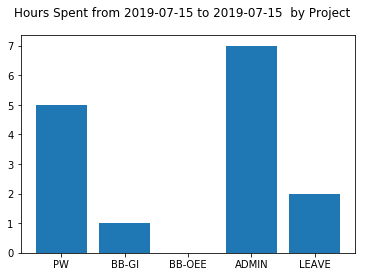

In [5]:
outlook.plot_bar_for_hours_on_projects_in_range(datetime.datetime(2019, 7, 15, 0, 0),datetime.datetime(2019, 7, 16, 0, 0))

In [6]:
import ipywidgets as widgets
import datetime
dates = [datetime.date(2015,i,1) for i in range(1,13)]
options = [(i.strftime('%b'), i) for i in dates]
value = widgets.SelectionRangeSlider(
    options=options,
    index=(0,11),
    description='Months (2015)',
    disabled=False
)
value

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …

In [7]:
value.value[0]

datetime.date(2015, 1, 1)